# Case Study: Land use analysis of OU campus

What if we did an analysis of land use on the OU campus?

Could get both RGB imagery as well as computing NDVI. The Carpentries course,
https://carpentries-incubator.github.io/geospatial-python/09-raster-calculations.html, does
NDVI computations and then creates a classification scheme to create a discrete raster from
the continuous NDVI raster. All quite relevant. Sections before this one do typical 
raster and vector operations such as cropping, reprojecting and matching different layers.

- green space
- golf courses
- roads
- buildings
- parking lots
- sports facilities
- sidewalks

Could look at how things have changed over time.

Would require combo of raster and vector data.

- single and multi-band rasters
- missing data in rasters
- cropping rasters

Where to get the vector data? What kind of vector data exists for the OU campus?

How to do the land use analysis?

# National Land Cover Database

> The National Land Cover Database (NLCD) provides nationwide data on land cover and land cover change at a 30m resolution with a 16-class legend based on a modified Anderson Level II classification system. NLCD 2021 represents the latest evolution of NLCD land cover products focused on providing innovative land cover and land cover change data for the Nation. NLCD 2021 offers 9 integrated epochs of land cover for years 2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, and 2021. chs (2001 – 2021) and are directly comparable across the full time series and suitable for multi-temporal analysis. The NLCD 2021 release is update based, so the Land Cover and Impervious Surface products released in 2019 are unchanged and can be used directly with NLCD 2021. Science products and the change index will need to be reacquired to contain the additional 2021 change. Specific map products include:Developed classes in these years are directly derived from percent developed impervious surface and include a descriptor label that identifies the type of each impervious surface pixel. The NLCD Land Cover change index combines information from all years of land cover change and provides a simple and comprehensive way to visualize change from all 9 dates of land cover in a single layer. The change index was designed to assist NLCD users to understand complex land cover change with a single product. NLCD 2021 does not yet contain updated products for Alaska, Hawaii and Puerto Rico. 

There's a bunch of things that need to be done in order be able to easily use this data to look at the land use on our campus. But, we'll skip those details for now and just work with one GeoTIFF file that I've already created for us. This file is named **ou_land_cover_2021.tif** and you can find it in the **data** subfolder. As you can tell from the filename, this data is for 2021, the latest data available in the NLCD.

This is raster data, so we expect that there's going to be arrays involved. Also, tif files contain spatial metadata that will be extremely important. So, how do we read and explore this file? You might have guessed that numpy would be involved. It is, in some ways, but there are libraries specifically designed to work with multidimensional raster data. The two we will use are xarray and rioxarray.

### Question

Here's a question.

### Answer

In [1]:
print("here's the answer")

here's the answer


## xarray and rioxarray

### [xarray](https://docs.xarray.dev/en/stable/) - labelled multidimension arrays

Xarray builds on top of NumPy N-d arrays and adds ability to create and work with labels for the dimensions. 

> Xarray makes working with labelled multi-dimensional arrays in Python simple, efficient, and fun!

The two main data structures are `DataArray` (a N-d generalization of a `pandas.Series`) and `DataSet` (an N-d generalization of a `pandas.DataFrame`). The [Overview: Why xarray?](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html) page has a nice level of detail on the case for xarray and its link to geospatial analysis.

### [rioxarray](https://corteva.github.io/rioxarray/html/readme.html) - read raster data into xarray objects

The rioxarray package extends the xarray package to facilitate reading raster data into xarray objects. The actual reading of the raster file is done using another Python package known as [rasterio](https://rasterio.readthedocs.io/en/latest/). From the rasterio docs:

> Geographic information systems use GeoTIFF and other formats to organize and store gridded raster datasets such as satellite imagery and terrain models. Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.

> Before Rasterio there was one Python option for accessing the many different kind of raster data files used in the GIS field: the Python bindings distributed with the Geospatial Data Abstraction Library, GDAL. These bindings extend Python, but provide little abstraction for GDAL’s C API. This means that Python programs using them tend to read and run like C programs. 

We will learn more about GDAL later in the module.


## Reading a GeoTIFF file

In [2]:
# Load libraries
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We also need to import rioxarray.

In [3]:
import rioxarray

Use rioxarray's [open_rasterio()](https://corteva.github.io/rioxarray/html/rioxarray.html) method to read the TIFF file into an xarray `DataArray`. This function has numerous optional input arguments, but for our file we can simply pass in the path to the file and leave everything else at their default values.

In [4]:
ou_landcover_2021_da = rioxarray.open_rasterio(Path(Path.cwd(), 'data', 'ou_land_cover_2021.tif'))
ou_landcover_2021_da

<xarray.DataArray (band: 1, y: 166, x: 375)>
[62250 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.034e+06 1.034e+06 ... 1.045e+06 1.045e+06
  * y            (y) float64 2.258e+06 2.258e+06 ... 2.253e+06 2.253e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:        Area
    LAYER_TYPE:           thematic
    OVERVIEWS_ALGORITHM:  IMAGINE Nearest Neighbor Resampling
    scale_factor:         1.0
    add_offset:           0.0
    long_name:            Layer_1

From the output above we can see that `ou_landcover_2021_da` consists of a single band with an associated data matrix for that band. Use the `shape` property to see the matrix dimensions.

In [5]:
ou_landcover_2021_da.shape

(1, 166, 375)

The first dimension is the band, the second is height (`y`) and the third is width (`x`). So, our matrix has 166 rows and 375 columns.

To get at the actual values we use the `values` property of the `DataArray`. For assets with multiple bands (such as visual), each band has an associated (y, x) matrix.

In [9]:
ou_landcover_2021_da.values

array([[[23, 23, 23, ..., 22, 22, 23],
        [24, 23, 23, ..., 24, 23, 23],
        [24, 24, 23, ..., 24, 22, 23],
        ...,
        [22, 22, 23, ..., 22, 21, 21],
        [22, 21, 22, ..., 22, 21, 21],
        [23, 22, 21, ..., 22, 21, 21]]], dtype=uint8)

What is the data type of this matrix?

In [7]:
type(ou_landcover_2021_da.values)

numpy.ndarray

Ah, so xarray is using numpy under the hood. That means we can use standard numpy methods to explore and modify the array. By now, you've probably realized that this array is the raster data. That's it. Raster data is just an array of values.

In this case, the values are discrete classification levels describing land use in the NLCD. From their website, I found the legend defining the values. Notice that there are groupings of values. For example, all values whose leading digit is a `2` (i.e in \[20,29\]) are classified as "Developed". 

```
National Land Cover Database Class Legend and Description
Class\ Value
Classification Description

Water
- 11 Open Water- areas of open water, generally with less than 25% cover of vegetation
or soil.
- 12 Perennial Ice/Snow- areas characterized by a perennial cover of ice and/or snow,
generally greater than 25% of total cover.

Developed
- 21 Developed, Open Space- areas with a mixture of some constructed materials, but
mostly vegetation in the form of lawn grasses. Impervious surfaces account for less
than 20% of total cover. These areas most commonly include large-lot single-family
housing units, parks, golf courses, and vegetation planted in developed settings for
recreation, erosion control, or aesthetic purposes.
- 22 Developed, Low Intensity- areas with a mixture of constructed materials and
vegetation. Impervious surfaces account for 20% to 49% percent of total cover.
These areas most commonly include single-family housing units.
- 23 Developed, Medium Intensity -areas with a mixture of constructed materials and
vegetation. Impervious surfaces account for 50% to 79% of the total cover. These
areas most commonly include single-family housing units.
- 24 Developed High Intensity-highly developed areas where people reside or work in
high numbers. Examples include apartment complexes, row houses and
commercial/industrial. Impervious surfaces account for 80% to 100% of the total
cover.

Barren
- 31 Barren Land (Rock/Sand/Clay) - areas of bedrock, desert pavement, scarps, talus,
slides, volcanic material, glacial debris, sand dunes, strip mines, gravel pits and other
accumulations of earthen material. Generally, vegetation accounts for less than 15%
of total cover.

Forest
- 41 Deciduous Forest- areas dominated by trees generally greater than 5 meters tall,
and greater than 20% of total vegetation cover. More than 75% of the tree species
shed foliage simultaneously in response to seasonal change.
- 42 Evergreen Forest- areas dominated by trees generally greater than 5 meters tall,
and greater than 20% of total vegetation cover. More than 75% of the tree species
maintain their leaves all year. Canopy is never without green foliage.43
Mixed Forest- areas dominated by trees generally greater than 5 meters tall, and
greater than 20% of total vegetation cover. Neither deciduous nor evergreen species
are greater than 75% of total tree cover.

Shrubland
- 51 Dwarf Scrub- Alaska only areas dominated by shrubs less than 20 centimeters tall
with shrub canopy typically greater than 20% of total vegetation. This type is often
co-associated with grasses, sedges, herbs, and non-vascular vegetation.
- 52 Shrub/Scrub- areas dominated by shrubs; less than 5 meters tall with shrub canopy
typically greater than 20% of total vegetation. This class includes true shrubs, young
trees in an early successional stage or trees stunted from environmental conditions.

Herbaceous
- 71 Grassland/Herbaceous- areas dominated by gramanoid or herbaceous vegetation,
generally greater than 80% of total vegetation. These areas are not subject to
intensive management such as tilling, but can be utilized for grazing.
- 72 Sedge/Herbaceous- Alaska only areas dominated by sedges and forbs, generally
greater than 80% of total vegetation. This type can occur with significant other
grasses or other grass like plants, and includes sedge tundra, and sedge tussock
tundra.
- 73 Lichens- Alaska only areas dominated by fruticose or foliose lichens generally
greater than 80% of total vegetation.
- 74 Moss- Alaska only areas dominated by mosses, generally greater than 80% of total
vegetation.

Planted/Cultivated
- 81 Pasture/Hay-areas of grasses, legumes, or grass-legume mixtures planted for
livestock grazing or the production of seed or hay crops, typically on a perennial
cycle. Pasture/hay vegetation accounts for greater than 20% of total vegetation.
- 82 Cultivated Crops -areas used for the production of annual crops, such as corn,
soybeans, vegetables, tobacco, and cotton, and also perennial woody crops such as
orchards and vineyards. Crop vegetation accounts for greater than 20% of total
vegetation. This class also includes all land being actively tilled.

Wetlands
- 90 Woody Wetlands- areas where forest or shrubland vegetation accounts for greater
than 20% of vegetative cover and the soil or substrate is periodically saturated with
or covered with water.
- 95 Emergent Herbaceous Wetlands- Areas where perennial herbaceous vegetation
accounts for greater than 80% of vegetative cover and the soil or substrate is
periodically saturated with or covered with water.
```

### Question

You can use the [numpy.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) function to get a count of the number of cells corresponding to each classification value. Try it.

In [ ]:
# Counts by class


### Answer

In [9]:
class_vals, class_counts = np.unique(ou_landcover_2021_da.values, return_counts=True)
print(np.asarray((class_vals, class_counts)).T)

[[   11   250]
 [   21 14712]
 [   22 16239]
 [   23 14205]
 [   24  8307]
 [   31    20]
 [   41  4381]
 [   42    24]
 [   43   177]
 [   52    37]
 [   71   105]
 [   81   224]
 [   82     2]
 [   90  3473]
 [   95    94]]


## Plotting the raster

You can plot a `DataArray` directly with matplotlib by using the `plot()` method.

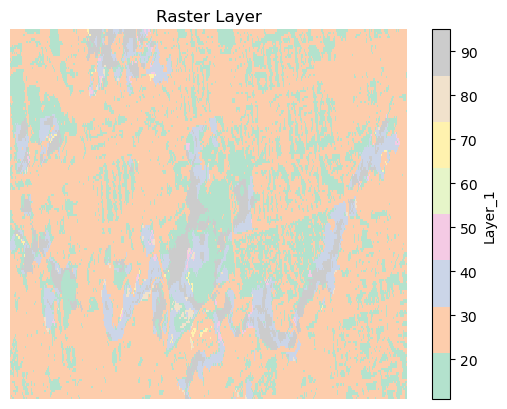

In [10]:
f, ax = plt.subplots()
ou_landcover_2021_da.plot(ax=ax, cmap='Pastel2')

ax.set(title="Raster Layer")

ax.set_axis_off()
plt.show()


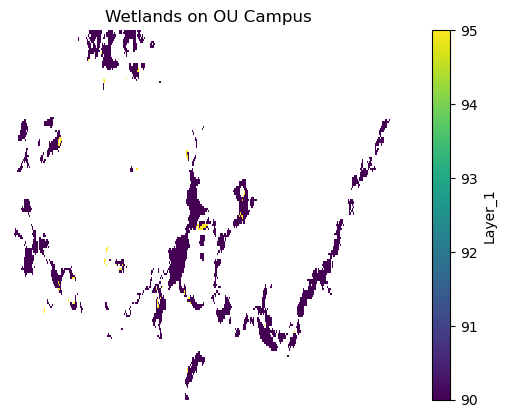

In [15]:
f, ax = plt.subplots()
ou_landcover_2021_da.where(ou_landcover_2021_da >= 90).plot(ax=ax)

ax.set(title="Wetlands on OU Campus")

ax.set_axis_off()
plt.show()


**TODO** Could we really use a custom color maps.

## Next steps

**TODO** Give overview of overall analysis that we'll do in the module as well as what we'll do in next section.